In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import calendar
import sys
sys.path.append('../')  # Add the parent folder to the Python path

from sql_functions import get_dataframe  # Import the function


In [91]:
query_2015 = '''
	SELECT * 
	FROM group3.flights_2015
	WHERE flight_date  >= '2015-01-22'::timestamp
	AND flight_date <= '2015-01-28'::timestamp
	AND (
		origin IN (
			'New York, NY',
			'Washington, DC',
			'Philadelphia, PA'
		) 
		OR 
		destination IN (
			'New York, NY',
			'Washington, DC',
			'Philadelphia, PA'
		)
	);
'''


flights_2015_event = get_dataframe(query_2015)
# Filter for cancelled flights with cancellation_code = "B"
cancelled_B_flights_2015 = flights_2015_event[(flights_2015_event['cancelled'] == 1) & (flights_2015_event['cancellation_code'] == "B")]

# Filter for flights that were not canceled and had a delay
not_cancelled_delayed_flights_2015 = flights_2015_event[((flights_2015_event['had_delay'] == 1) & ((flights_2015_event['arr_delay'] > 30) | (flights_2015_event['dep_delay'] > 30)))]

# Aggregate the counts for canceled flights and delayed flights that were not canceled
monthly_counts_cancelled_2015 = cancelled_B_flights_2015.groupby(['day']).size().reset_index(name='cancelled')
monthly_counts_delayed_2015 = not_cancelled_delayed_flights_2015.groupby(['day']).size().reset_index(name='had_delay')

# Merge the two counts on year and month
monthly_counts_2015 = monthly_counts_cancelled_2015.merge(monthly_counts_delayed_2015, on=['day'], how='outer').fillna(0)



query_2015 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('New York, NY', 'Washington, DC', 'Philadelphia, PA')
	AND date >= '2015-01-22'::timestamp
	AND date <= '2015-01-28'::timestamp;
'''

weather_2015 = get_dataframe(query_2015)
weather_2015.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2015.dropna()
daily_averages_2015 = weather_2015[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()


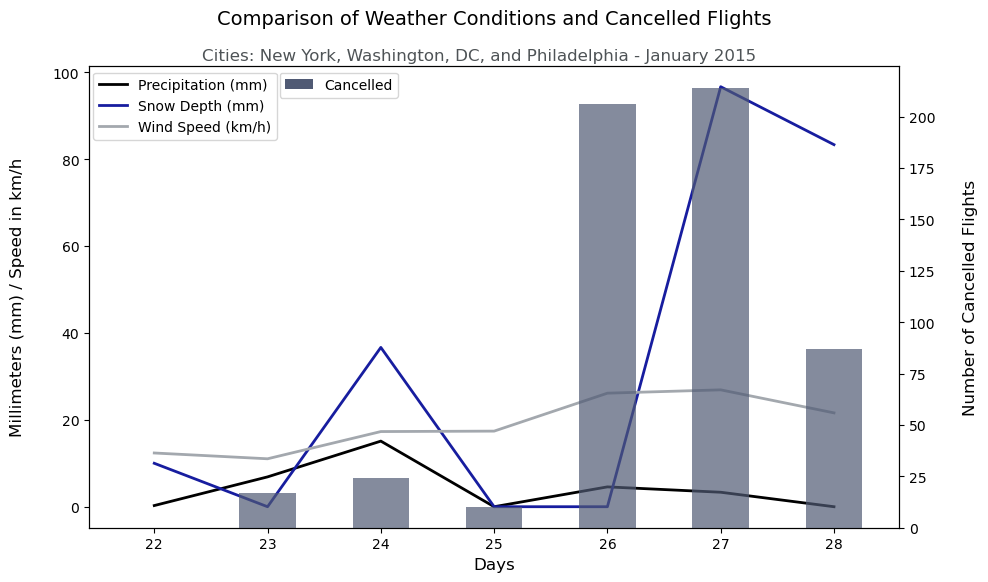

In [109]:
# Filter for the 3 main cities
main_cities = [
    "New York, NY",
    "Washington, DC",
    "Philadelphia, PA"
]

# Filter weather data for main cities
main_cities_weather = weather_2015[weather_2015['city_name'].isin(main_cities)]

# Group weather data by day and calculate average weather conditions for the main cities
daily_avg_weather = main_cities_weather.groupby('day').mean()

# Group flight data by day and calculate the number of canceled flights per day
daily_cancelled_flights = monthly_counts_2015.groupby('day')['cancelled'].sum()

# Merge weather data and canceled flights data
merged_data = pd.merge(daily_avg_weather, daily_cancelled_flights, left_index=True, right_index=True, how='outer')

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting weather data on the left y-axis
weather_lines = []
weather_labels = []
weather_lines.append(ax1.plot(merged_data.index, merged_data['preciptation_mm'], color='#000', linewidth=2.0)[0])
weather_labels.append('Precipitation (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['snowdepth_mm'], color='#171d9f', linewidth=2.0)[0])
weather_labels.append('Snow Depth (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['avg_windspeed_kmh'], color='#A3A8AE', linewidth=2.0)[0])
weather_labels.append('Wind Speed (km/h)')

# Setting the left y-axis label
ax1.set_ylabel('Millimeters (mm) / Speed in km/h', fontsize=12, labelpad=20)

# Creating a twin Axes sharing the x-axis for flight data on the right y-axis
ax2 = ax1.twinx()

# Plotting flight data
flight_bars = ax2.bar(merged_data.index, merged_data['cancelled'], color='#505a74', alpha=0.7, width=0.5)

# Setting the right y-axis label
ax2.set_ylabel('Number of Cancelled Flights', fontsize=12, labelpad=20)

# Set x-axis label
ax1.set_xlabel('Days', fontsize=12)

# Title
plt.title('Comparison of Weather Conditions and Cancelled Flights', fontsize=14, pad=30)
plt.suptitle('Cities: New York, Washington, DC, and Philadelphia - January 2015', color='#4E5356', y=0.91, x=0.45)

# Create custom legend
legend_elements = [
    Patch(facecolor='#505a74', edgecolor='none', label='Cancelled'),
]

# Combine weather and flights legends
weather_legend = ax1.legend(weather_lines, weather_labels, loc='upper right', bbox_to_anchor=(0.24, 1))
flight_legend = ax2.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.39, 1))

# Adjust layout to make room for legends
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


In [93]:
query_2016 = '''
	SELECT * 
	FROM group3.flights_2016
	WHERE flight_date  >= '2016-01-22'::timestamp
	AND flight_date <= '2016-01-28'::timestamp
	AND (
		origin IN (
			'New York, NY',
			'Washington, DC',
			'Philadelphia, PA'
		) 
		OR 
		destination IN (
			'New York, NY',
			'Washington, DC',
			'Philadelphia, PA'
		)
	);
'''


flights_2016_event = get_dataframe(query_2016)
# Filter for cancelled flights with cancellation_code = "B"
cancelled_B_flights_2016 = flights_2016_event[(flights_2016_event['cancelled'] == 1) & (flights_2016_event['cancellation_code'] == "B")]

# Filter for flights that were not canceled and had a delay
not_cancelled_delayed_flights_2016 = flights_2016_event[((flights_2016_event['had_delay'] == 1) & ((flights_2016_event['arr_delay'] > 30) | (flights_2016_event['dep_delay'] > 30)))]

# Aggregate the counts for canceled flights and delayed flights that were not canceled
monthly_counts_cancelled_2016 = cancelled_B_flights_2016.groupby(['day']).size().reset_index(name='cancelled')
monthly_counts_delayed_2016 = not_cancelled_delayed_flights_2016.groupby(['day']).size().reset_index(name='had_delay')

# Merge the two counts on year and month
monthly_counts_2016 = monthly_counts_cancelled_2016.merge(monthly_counts_delayed_2016, on=['day'], how='outer').fillna(0)



query_2016 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('New York, NY', 'Washington, DC', 'Philadelphia, PA')
	AND date >= '2016-01-22'::timestamp
	AND date <= '2016-01-28'::timestamp;
'''

weather_2016 = get_dataframe(query_2016)
weather_2016.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2016.dropna()
daily_averages_2016 = weather_2016[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()


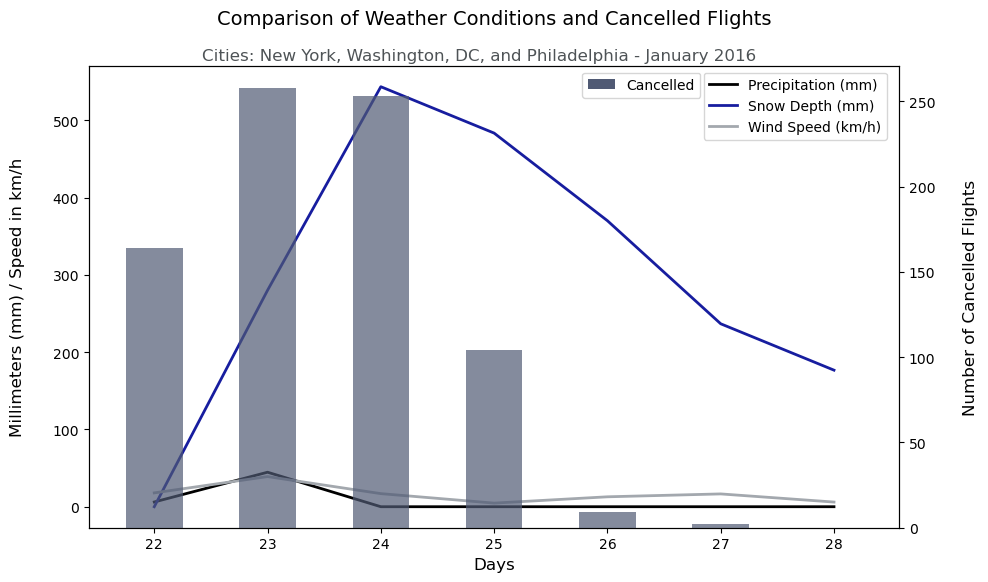

In [99]:
# Filter for the 3 main cities
main_cities = [
    "New York, NY",
    "Washington, DC",
    "Philadelphia, PA"
]

# Filter weather data for main cities
main_cities_weather = weather_2016[weather_2016['city_name'].isin(main_cities)]

# Group weather data by day and calculate average weather conditions for the main cities
daily_avg_weather = main_cities_weather.groupby('day').mean()

# Group flight data by day and calculate the number of canceled flights per day
daily_cancelled_flights = monthly_counts_2016.groupby('day')['cancelled'].sum()

# Merge weather data and canceled flights data
merged_data = pd.merge(daily_avg_weather, daily_cancelled_flights, left_index=True, right_index=True, how='outer')

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting weather data on the left y-axis
weather_lines = []
weather_labels = []
weather_lines.append(ax1.plot(merged_data.index, merged_data['preciptation_mm'], color='#000', linewidth=2.0)[0])
weather_labels.append('Precipitation (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['snowdepth_mm'], color='#171d9f', linewidth=2.0)[0])
weather_labels.append('Snow Depth (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['avg_windspeed_kmh'], color='#A3A8AE', linewidth=2.0)[0])
weather_labels.append('Wind Speed (km/h)')

# Setting the left y-axis label
ax1.set_ylabel('Millimeters (mm) / Speed in km/h', fontsize=12, labelpad=20)

# Creating a twin Axes sharing the x-axis for flight data on the right y-axis
ax2 = ax1.twinx()

# Plotting flight data
flight_bars = ax2.bar(merged_data.index, merged_data['cancelled'], color='#505a74', alpha=0.7, width=0.5)

# Setting the right y-axis label
ax2.set_ylabel('Number of Cancelled Flights', fontsize=12, labelpad=20)

# Set x-axis label
ax1.set_xlabel('Days', fontsize=12)

# Title
plt.title('Comparison of Weather Conditions and Cancelled Flights', fontsize=14, pad=30)
plt.suptitle('Cities: New York, Washington, DC, and Philadelphia - January 2016', color='#4E5356', y=0.91, x=0.45)

# Create custom legend
legend_elements = [
    Patch(facecolor='#505a74', edgecolor='none', label='Cancelled'),
]

# Combine weather and flights legends
weather_legend = ax1.legend(weather_lines, weather_labels, loc='upper left', bbox_to_anchor=(0.75, 1))
flight_legend = ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.6, 1))

# Adjust layout to make room for legends
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


In [66]:
query_2015 = '''
	SELECT * 
	FROM group3.flights_2015
	WHERE flight_date  >= '2015-01-22'::timestamp
	AND flight_date <= '2015-01-28'::timestamp
	AND (
		origin IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
		OR 
		destination IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
	);
'''


flights_2015_event = get_dataframe(query_2015)
# Filter for cancelled flights with cancellation_code = "B"
cancelled_B_flights_2015 = flights_2015_event[(flights_2015_event['cancelled'] == 1) & (flights_2015_event['cancellation_code'] == "B")]

# Filter for flights that were not canceled and had a delay
not_cancelled_delayed_flights_2015 = flights_2015_event[((flights_2015_event['had_delay'] == 1) & ((flights_2015_event['arr_delay'] > 30) | (flights_2015_event['dep_delay'] > 30)))]

# Aggregate the counts for canceled flights and delayed flights that were not canceled
monthly_counts_cancelled_2015 = cancelled_B_flights_2015.groupby(['day']).size().reset_index(name='cancelled')
monthly_counts_delayed_2015 = not_cancelled_delayed_flights_2015.groupby(['day']).size().reset_index(name='had_delay')

# Merge the two counts on year and month
monthly_counts_2015 = monthly_counts_cancelled_2015.merge(monthly_counts_delayed_2015, on=['day'], how='outer').fillna(0)



query_2015 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
	AND date >= '2015-01-22'::timestamp
	AND date <= '2015-01-28'::timestamp;
'''

weather_2015 = get_dataframe(query_2015)
weather_2015.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2015.dropna()
daily_averages_2015 = weather_2015[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()


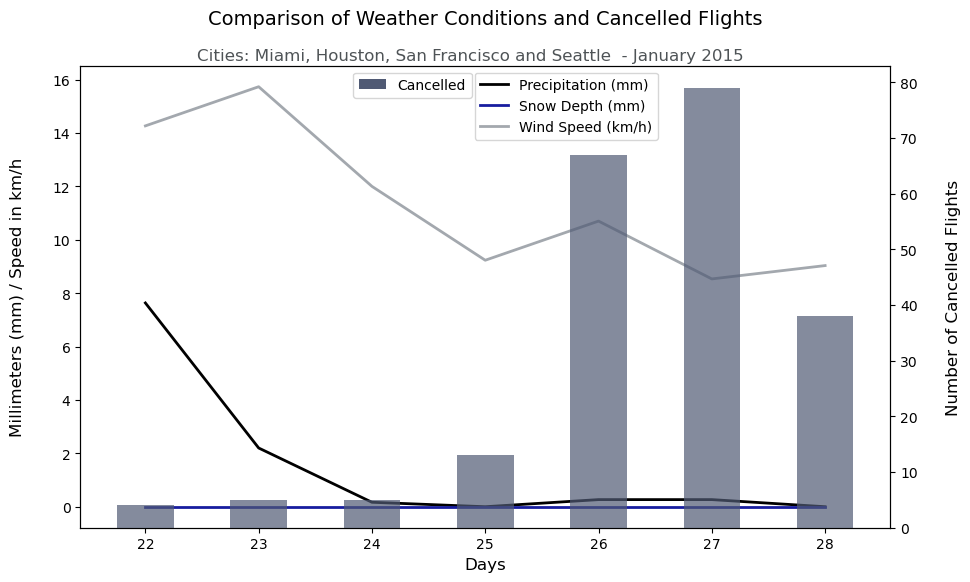

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# Filter for the 3 main cities
main_cities = [
'Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA'
]

# Filter weather data for main cities
main_cities_weather = weather_2015[weather_2015['city_name'].isin(main_cities)]

# Group weather data by day and calculate average weather conditions for the main cities
daily_avg_weather = main_cities_weather.groupby('day').mean()

# Group flight data by day and calculate the number of canceled flights per day
daily_cancelled_flights = monthly_counts_2015.groupby('day')['cancelled'].sum()

# Merge weather data and canceled flights data
merged_data = pd.merge(daily_avg_weather, daily_cancelled_flights, left_index=True, right_index=True, how='outer')

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting weather data on the left y-axis
weather_lines = []
weather_labels = []
weather_lines.append(ax1.plot(merged_data.index, merged_data['preciptation_mm'], color='#000', linewidth=2.0)[0])
weather_labels.append('Precipitation (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['snowdepth_mm'], color='#171d9f', linewidth=2.0)[0])
weather_labels.append('Snow Depth (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['avg_windspeed_kmh'], color='#A3A8AE', linewidth=2.0)[0])
weather_labels.append('Wind Speed (km/h)')

# Setting the left y-axis label
ax1.set_ylabel('Millimeters (mm) / Speed in km/h', fontsize=12, labelpad=20)

# Creating a twin Axes sharing the x-axis for flight data on the right y-axis
ax2 = ax1.twinx()

# Plotting flight data
flight_bars = ax2.bar(merged_data.index, merged_data['cancelled'], color='#505a74', alpha=0.7, width=0.5)

# Setting the right y-axis label
ax2.set_ylabel('Number of Cancelled Flights', fontsize=12, labelpad=20)

# Set x-axis label
ax1.set_xlabel('Days', fontsize=12)

# Title
plt.title('Comparison of Weather Conditions and Cancelled Flights', fontsize=14, pad=30)
plt.suptitle('Cities: Miami, Houston, San Francisco and Seattle  - January 2015', color='#4E5356', y=0.91, x=0.45)

# Create custom legend
legend_elements = [
    Patch(facecolor='#505a74', edgecolor='none', label='Cancelled'),
]

# Combine weather and flights legends
weather_legend = ax1.legend(weather_lines, weather_labels, loc='upper center', bbox_to_anchor=(0.6, 1))
flight_legend = ax2.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.41, 1))

# Adjust layout to make room for legends
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()


In [111]:
query_2016 = '''
	SELECT * 
	FROM group3.flights_2016
	WHERE flight_date  >= '2016-01-22'::timestamp
	AND flight_date <= '2016-01-28'::timestamp
	AND (
		origin IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
		OR 
		destination IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
	);
'''


flights_2016_event = get_dataframe(query_2016)
# Filter for cancelled flights with cancellation_code = "B"
cancelled_B_flights_2016 = flights_2016_event[(flights_2016_event['cancelled'] == 1) & (flights_2016_event['cancellation_code'] == "B")]

# Filter for flights that were not canceled and had a delay
not_cancelled_delayed_flights_2016 = flights_2016_event[((flights_2016_event['had_delay'] == 1) & ((flights_2016_event['arr_delay'] > 30) | (flights_2016_event['dep_delay'] > 30)))]

# Aggregate the counts for canceled flights and delayed flights that were not canceled
monthly_counts_cancelled_2016 = cancelled_B_flights_2016.groupby(['day']).size().reset_index(name='cancelled')
monthly_counts_delayed_2016 = not_cancelled_delayed_flights_2016.groupby(['day']).size().reset_index(name='had_delay')

# Merge the two counts on year and month
monthly_counts_2016 = monthly_counts_cancelled_2016.merge(monthly_counts_delayed_2016, on=['day'], how='outer').fillna(0)



query_2016 = '''
	SELECT * 
	FROM group3.full_weather
	WHERE city_name IN ('Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA') 
	AND date >= '2016-01-22'::timestamp
	AND date <= '2016-01-28'::timestamp;
'''

weather_2016 = get_dataframe(query_2016)
weather_2016.drop(columns=['min_temp_°C', 'max_temp_°C'], inplace=True)
weather_2016.dropna()
daily_averages_2016 = weather_2016[['date','avg_temp_°C', 'preciptation_mm', 'snowdepth_mm', 'avg_windspeed_kmh']].groupby('date').mean()


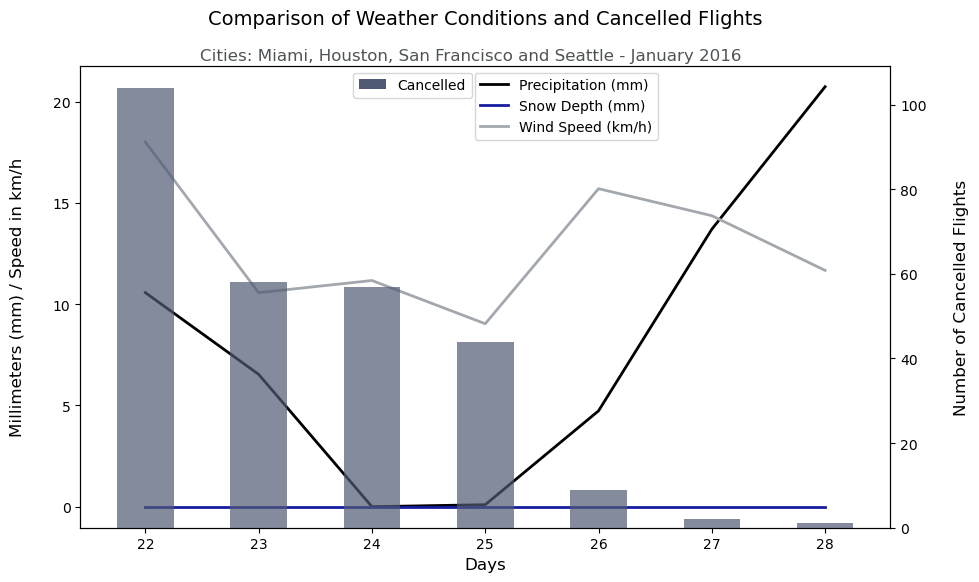

In [113]:
# Filter for the 3 main cities
main_cities = [
'Miami, FL', 'Houston, TX', 'San Francisco, CA', 'Seattle, WA'
]

# Filter weather data for main cities
main_cities_weather = weather_2016[weather_2016['city_name'].isin(main_cities)]

# Group weather data by day and calculate average weather conditions for the main cities
daily_avg_weather = main_cities_weather.groupby('day').mean()

# Group flight data by day and calculate the number of canceled flights per day
daily_cancelled_flights = monthly_counts_2016.groupby('day')['cancelled'].sum()

# Merge weather data and canceled flights data
merged_data = pd.merge(daily_avg_weather, daily_cancelled_flights, left_index=True, right_index=True, how='outer')

# Plotting the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting weather data on the left y-axis
weather_lines = []
weather_labels = []
weather_lines.append(ax1.plot(merged_data.index, merged_data['preciptation_mm'], color='#000', linewidth=2.0)[0])
weather_labels.append('Precipitation (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['snowdepth_mm'], color='#171d9f', linewidth=2.0)[0])
weather_labels.append('Snow Depth (mm)')
weather_lines.append(ax1.plot(merged_data.index, merged_data['avg_windspeed_kmh'], color='#A3A8AE', linewidth=2.0)[0])
weather_labels.append('Wind Speed (km/h)')

# Setting the left y-axis label
ax1.set_ylabel('Millimeters (mm) / Speed in km/h', fontsize=12, labelpad=20)

# Creating a twin Axes sharing the x-axis for flight data on the right y-axis
ax2 = ax1.twinx()

# Plotting flight data
flight_bars = ax2.bar(merged_data.index, merged_data['cancelled'], color='#505a74', alpha=0.7, width=0.5)

# Setting the right y-axis label
ax2.set_ylabel('Number of Cancelled Flights', fontsize=12, labelpad=20)

# Set x-axis label
ax1.set_xlabel('Days', fontsize=12)

# Title
plt.title('Comparison of Weather Conditions and Cancelled Flights', fontsize=14, pad=30)
plt.suptitle('Cities: Miami, Houston, San Francisco and Seattle - January 2016', color='#4E5356', y=0.91, x=0.45)

# Create custom legend
legend_elements = [
    Patch(facecolor='#505a74', edgecolor='none', label='Cancelled'),
]

# Combine weather and flights legends
weather_legend = ax1.legend(weather_lines, weather_labels, loc='upper center', bbox_to_anchor=(0.6, 1))
flight_legend = ax2.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.41, 1))

# Adjust layout to make room for legends
plt.subplots_adjust(right=0.8)

# Show plot
plt.show()
